# Linear Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Get the training data

In [4]:
dfx = pd.read_csv('/home/shaggy/CodingBlocks/NoteBooks/Datasets/LinearX.csv')
dfy = pd.read_csv('/home/shaggy/CodingBlocks/NoteBooks/Datasets/LinearY.csv')

In [5]:
x = dfx.values
y = dfy.values

print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


## Visualise and Preprocesses the data

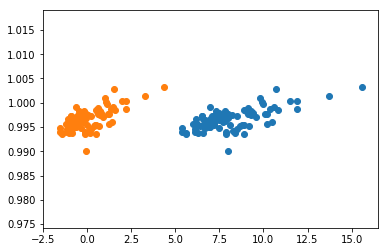

In [6]:
plt.scatter(x,y)
X = (x-x.mean())/x.std()
Y= y
plt.scatter(X,Y)
plt.show()

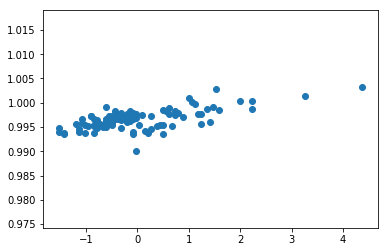

In [7]:
plt.scatter(X,Y)
plt.show()

## Gradient Algorithm

- start with  a random theta
- Repeat until Converge
    - Update theta according to rule

In [11]:
def hypothesis(X,theta):
    return theta[0] + theta[1]*X


def error(X,Y,theta):
    
    m = X.shape[0]
    error = 0 
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
        
    return error


def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] += (hx - Y[i])
        grad[1] += (hx - Y[i])* X[i]
        
    return grad
    

# Algorithm
def gradientDecent(X,Y,learning_rate = 0.001):
    
    theta = np.array([-2.0,0.0])
    
    itr = 0
    max_itr = 100
    
    error_list = []
    theta_list = []
    
    while (itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        itr+=1
        
    return theta,error_list,theta_list


In [12]:
final_theta ,error_list,theta_list = gradientDecent(X,Y)

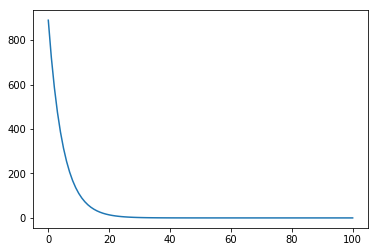

In [10]:
plt.plot(error_list)
plt.show()

In [13]:
print(final_theta)

[0.996554  0.0013579]


In [14]:
## plot line for test data

xtest = np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


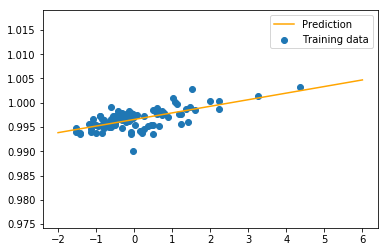

In [38]:
plt.scatter(X,Y,label='Training data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label='Prediction')
plt.legend()
plt.show()

# Visualising Gradient Decent

- Ploting Error surface and contours

In [39]:
from mpl_toolkits.mplot3d import axes3d

In [41]:
T0 = np.arange(-2,3,0.01)
T1 = np.arange(-2,3,0.01)

T0,T1 = np.meshgrid(T0,T1)

J = np.zeros(T0.shape)

m = T0.shape[0]
n = T1.shape[1]

for i in range(m):
    for j in range(n):
        J[i,j] = np.sum((Y - T1[i,j]*X - T0[i,j])**2)
        

print(J.shape)

(500, 500)


In [42]:
theta_list = np.array(theta_list)

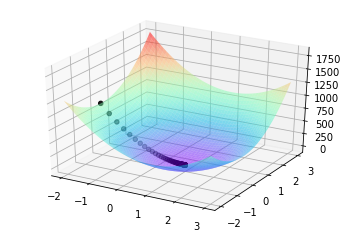

In [45]:
## plot the 3d Loss

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,c='k')
axes.plot_surface(T0,T1,J,cmap='rainbow',alpha=0.5)
plt.show()

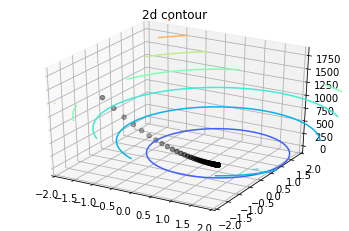

In [46]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.set_xlim([-2,2])
axes.set_ylim([-2,2])
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,c='k')
axes.contour(T0,T1,J,cmap='rainbow')
plt.title("2d contour")
plt.show()

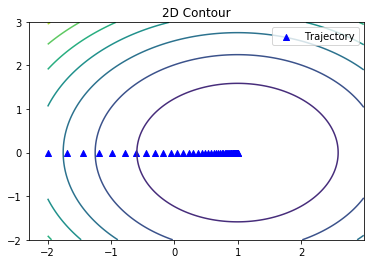

In [49]:
plt.contour(T0,T1,J)
plt.title('2D Contour')
plt.scatter(theta_list[:,0],theta_list[:,1],c='blue',marker='^',label='Trajectory')
plt.legend()
plt.show()